# Affine transforms using Scipy
In this section we demonstrate how to apply an affine transform using [scipy](https://scipy.org).


In [1]:
import numpy as np
from skimage.io import imread, imshow
from scipy import ndimage as ndi

In [2]:
image = imread('../../data/Haase_MRT_tfl3d1.tif')

(192, 256, 256)

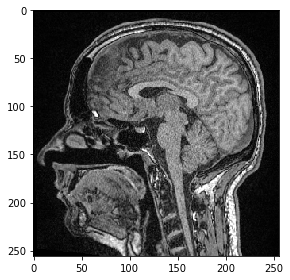

In [3]:
imshow(image[100])
image.shape

[Affine transforms](https://en.wikipedia.org/wiki/Affine_transformation#Image_transformation) are typically defines using transform matrices.

For example, we can enter a scaling factor into such a matrix like in the following. Typically, the inverse transform is managed in these matrices. In the case of scaling, we need to enter a scaling factor of `0.5` in case we want to increase the image size by factor `2`. The reason is that the affine transform matrix defines the transform that needs to be applied from every pixel in the target image to every pixel in the source image. If the target image is twice as large as the source, we need to multiply target pixel coordinates with `0.5` to determine the corresponding source pixel coordinates.

In [4]:
# scaling by factor 1 / s
s = 0.5
matrix = np.asarray([
    [s, 0, 0, 0],
    [0, s, 0, 0],
    [0, 0, s, 0],
    [0, 0, 0, 1],
])

Before applying the transform, we also need to calculate the output image size (shape) and create that output image:

In [5]:
output_shape = tuple((np.asarray(image.shape) / s).astype(int))
scaled = np.ndarray(output_shape)
scaled.shape

(384, 512, 512)

In [6]:
result = ndi.affine_transform(image, matrix, output=scaled, output_shape=output_shape)

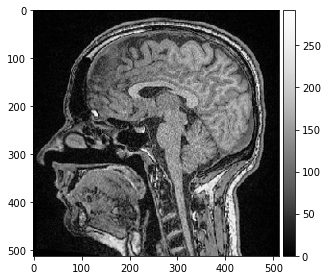

In [7]:
imshow(scaled[200], cmap="Greys_r", vmin=0)